<a href="https://colab.research.google.com/github/CharlyPierce/AlgebraLineal/blob/main/Opt_no_lin_siempre_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
ds=pd.read_csv('SeriesMarcianas.csv')
ds

,Unnamed: 0,serie1,serie2
0,NaN,23.807140,1780.591569
1,NaN,69.470820,15161.938195
2,NaN,51.452568,8316.947874
3,NaN,6.774270,144.170005
4,NaN,2.154216,14.579023
...,...,...,...
198,NaN,70.276546,15515.675527
199,NaN,70.005047,15396.023873
200,NaN,27.225853,2328.696283
201,NaN,104.350301,34208.756434


In [ ]:
x=np.array(ds.iloc[:,1:2]).reshape(-1,1)
y=np.array(ds.iloc[:,2:3]).reshape(-1,1)

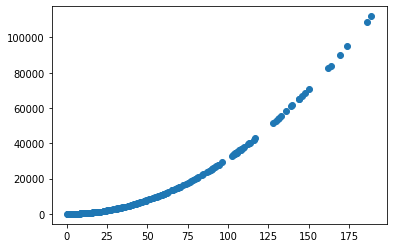

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=1)
x_po=pol.fit_transform(x)

In [ ]:
lin2=LinearRegression()
lin2.fit(x_po,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y1=lin2.predict(x_po)

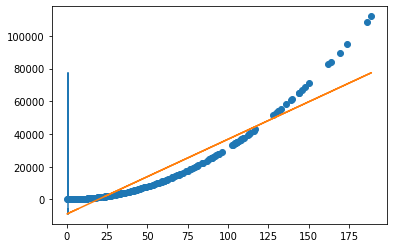

In [ ]:
plt.scatter(x,y)
plt.plot(x_po,y1)

Leibnitz' Rule
$$G(x)=\int_{a(x)}^{b(x)}h(x,y)dy$$
$$\frac{dG(x)}{dx}=\frac{db(x)}{dx}h(x,b(x))-\frac{da(x)}{dx}h(x,a(x))+\int_{a(x)}^{b(x)}\frac{dh(x,y)}{dx}dy$$


In [ ]:
(x)

In [ ]:
# -----------------Calculo de minimos por seccion dorada y evaluacion en diferencias finitas para ver quef'(x)=0----------------------------------
#Metodo de la seccion dorada o proporciones aureas
import sympy 
import time
import math
import random

class aurea:
  def __init__(self,f,x1):
    self.F=f
    self.x=x1#atributos
    self.au1=[]         #atributos
    self.i1=0
    self.phi=(1+math.sqrt(5))/2
    self.PMed=[]
  def ev(self,a,b,E):
    try:
      return ((math.log(E)-math.log(b-a)))/math.log(self.phi-1)
    except:
      return 0
  def func(self,F,x,x1):
    self.i1+=1
    return F.subs(x,x1)
  def algor(self,a,b,E):
    L=abs(b-a)#90
    T=self.phi-1#razon aurea
    x1=b-T*L
    x2=a+T*L
    ar=[a,b,x1,x2,self.F.subs(x,x1),self.F.subs(x,x2),L]
    #   0 1 2  3       4          5         6
    self.i1=0;i=0;
    a_in=time.time()
    while (ar[6]>E):
      if (ar[4]<ar[5]):#f(x1)<f(x2)
        ar=[ar[0],ar[3],ar[2],ar[2],ar[4],ar[4],ar[6]]
        ar[6]=abs(ar[1]-ar[0])#L=b-a
        ar[2]=ar[1]-T*ar[6]#x1=b-T*L
        ar[4]=self.func(self.F,self.x,ar[2])
      else:
        ar=[ar[2],ar[1],ar[3],ar[3],ar[5],ar[5],ar[6]]
        ar[6]=abs(ar[1]-ar[0])#L=b-a
        ar[3]=ar[0]+T*ar[6]#x2=a+T*L
        ar[5]=self.func(self.F,self.x,ar[3])
      i+=1
    b_fi=time.time()
    self.au1.append(self.i1)
    print('\nFuncion: ',self.F)
    print('\nIntervalo',a,b)
    print('No de evaluaciones:',self.i1,'\nIteracion No:',i,'\nTiempo de ejecucion:',b_fi-a_in)
    print('El No de eval debe ser menor a ',self.ev(a,b,E),'≈',math.ceil(self.ev(a,b,E)),'\nEl valor esta entre',ar[0],ar[1])
    print('Punto medio:x*=',(ar[0]+ar[1])/2,'evaluacion en el optimo: f(x*)=',self.func(self.F,self.x,(ar[0]+ar[1])/2))
    print('Tamaño del último intervalo',ar[6],'error establecido:',E)
    print('El intervalo debe ser menor al error',ar[6],'<',E)
    self.PMed.append((ar[0]+ar[1])/2)
    return (ar[0]+ar[1])/2


class DF(aurea):
  def __init1__(self,x0,h=0.0001):
    self.H=h
    self.X0=x0
    self.T=[]
    self.delante()
  def delante(self):
    d1=(self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0))/self.H
    self.T.append(d1)
    self.delante1()
  def delante1(self):
    d2= (-self.F.subs(x,self.X0+2*self.H)+4*self.F.subs(x,self.X0+self.H)-3*self.F.subs(x,self.X0) )/(2*self.H)
    self.T.append(d2)
    self.centrada()
  def centrada(self):
    c1= (self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0-self.H))/(2*self.H)
    self.T.append(c1)
    self.centrada1()
  def centrada1(self):
    c2= (-self.F.subs(x,self.X0+2*self.H)+8*self.F.subs(x,self.X0+self.H)-8*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(12*self.H)
    self.T.append(c2)
    self.atras()
  def atras(self):
    a1= (self.F.subs(x,self.X0)-self.F.subs(x,self.X0-self.H))/self.H
    self.T.append(a1)
    self.atras1()
  def atras1(self):
    a2= (3*self.F.subs(x,self.X0)-4*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(2*self.H)
    self.T.append(a2)
    print('\nDiferencias Finitas en el punto Xo:',self.X0)
    print('Adelante:',self.T[0],self.T[1])
    print('Centradas:',self.T[2],self.T[3])
    print('Atras:',self.T[4],self.T[5])


x=sympy.Symbol('x')
e=0.0005#Error
F1=[sympy.sympify(7*x**4+2*x**3+3*x+2),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
a1=[[-10,10],[-10,10],[-5,10],[-5,5],[-2,2]]
ins=[0]*len(F1)
j=0
for i in a1:
  ins[j]=DF(F1[j],x)
  pm=ins[j].algor(i[0],i[1],e)
  ins[j].__init1__(pm)
  j+=1


# ----------------------Primer y segunda derivada de funciones para condiciones de optimalidad----------------------------------------------

x=sympy.Symbol('x')
F1=[sympy.sympify(7*x**4+2*x**3+3*x+2),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
a1=[[-10,10],[-10,10],[-5,10],[-5,5],[-2,2]]
ins1=[0]*len(F1)
j=0
for i in a1:
  ins1[j]=F1[j]
  j1=sympy.diff(ins1[j])
  k=sympy.diff(j1)
  print(' F(x)=',ins1[j],'\n','F\'(x)=',j1,'\n','F\'(',ins[j].PMed[0],')=',j1.subs(x,ins[j].PMed[0]))
  print(' F\'\'(x)=',k,'\n','F\'\'(',ins[j].PMed[0],')=',k.subs(x,ins[j].PMed[0]),'\n')
  j+=1

# ----------------------------Diferencias Finitas para calcular primera y segunda derivada para el metodo de Newton-------------------------------

import sympy
class DF1:
  def __init__(self,f,x0,h=0.0001):
    self.F=f
    self.X0=x0
    self.H=h
    self.T=[]
    self.delante()
  def delante(self):
    d1=(self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0))/self.H
    self.T.append(d1)
    self.delante1()
  def delante1(self):
    d2= (-self.F.subs(x,self.X0+2*self.H)+4*self.F.subs(x,self.X0+self.H)-3*self.F.subs(x,self.X0) )/(2*self.H)
    self.T.append(d2)
    self.centrada()
  def centrada(self):
    c1= (self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0-self.H))/(2*self.H)
    self.T.append(c1)
    self.centrada1()
  def centrada1(self):
    c2= (-self.F.subs(x,self.X0+2*self.H)+8*self.F.subs(x,self.X0+self.H)-8*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(12*self.H)
    self.T.append(c2)
    self.atras()
  def atras(self):
    a1= (self.F.subs(x,self.X0)-self.F.subs(x,self.X0-self.H))/self.H
    self.T.append(a1)
    self.atras1()
  def atras1(self):
    a2= (3*self.F.subs(x,self.X0)-4*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(2*self.H)
    self.T.append(a2)
    #print(self.T)

class DF2:
  def __init__(self,f,x0,h):
    self.F=f
    self.X0=x0
    self.H=h
    self.T2=[]
    self.delante()
  def delante(self):
    d1=(self.F.subs(x,self.X0+2*self.H)-2*self.F.subs(x,self.X0+self.H)+self.F.subs(x,self.X0))/(self.H)**2
    self.T2.append(d1)
    self.delante1()
  def delante1(self):
    d2= (-self.F.subs(x,self.X0+3*self.H)+4*self.F.subs(x,self.X0+2*self.H)-5*self.F.subs(x,self.X0+self.H)+2*self.F.subs(x,self.X0) )/(self.H)**2
    self.T2.append(d2)
    self.centrada()
  def centrada(self):
    c1= (self.F.subs(x,self.X0+self.H)-2*self.F.subs(x,self.X0)+self.F.subs(x,self.X0-self.H))/(self.H)**2
    self.T2.append(c1)
    self.centrada1()
  def centrada1(self):
    c2= (-self.F.subs(x,self.X0+2*self.H)+16*self.F.subs(x,self.X0+self.H)-30*self.F.subs(x,self.X0)+16*self.F.subs(x,self.X0-self.H)-self.F.subs(x,self.X0-2*self.H) )/(12*(self.H)**2)
    self.T2.append(c2)
    self.atras()
  def atras(self):
    a1= (self.F.subs(x,self.X0)-2*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H))/self.H**2
    self.T2.append(a1)
    self.atras1()
  def atras1(self):
    a2= (2*self.F.subs(x,self.X0)-5*self.F.subs(x,self.X0-self.H)+4*self.F.subs(x,self.X0-2*self.H)-self.F.subs(x,self.X0-3*self.H) )/self.H**2
    self.T2.append(a2)
    #print(self.T2)

x=sympy.Symbol('x');e=0.0001;x0=-5
#7*x**4+2*x**3+3*x+2
F1=[sympy.sympify(2*x**3+3),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
fun1=DF1(F1[0],x0,e)
fun2=DF2(F1[0],x0,e)
#xn=xn-fnu.__init__1(xn,error)



# -----------------------------Metodo de Newton para Raiz de derivada--------------------------------------------------------------------
fun1.T[0]
fun2.T2[0]
xn=x0;i=0
print('xn:',xn)
while (i<15):
  xn=xn-(DF1(F1[0],xn,e).T[0]/DF2(F1[0],xn,e).T2[0])
  print('xn:',xn)
  i+=1


In [ ]:
#Metodo de la seccion dorada o proporciones aureas
import sympy 
import time
import math
import random

class aurea:
  def __init__(self,f,x1):
    self.F=f
    self.x=x1#atributos
    self.au1=[]         #atributos
    self.i1=0
    self.phi=(1+math.sqrt(5))/2
    self.PMed=[]
  def ev(self,a,b,E):
    try:
      return ((math.log(E)-math.log(b-a)))/math.log(self.phi-1)
    except:
      return 0
  def func(self,F,x,x1):
    self.i1+=1
    return F.subs(x,x1)
  def algor(self,a,b,E):
    L=abs(b-a)#90
    T=self.phi-1#razon aurea
    x1=b-T*L
    x2=a+T*L
    ar=[a,b,x1,x2,self.F.subs(x,x1),self.F.subs(x,x2),L]
    #   0 1 2  3       4          5         6
    self.i1=0;i=0;
    a_in=time.time()
    while (ar[6]>E):
      if (ar[4]<ar[5]):#f(x1)<f(x2)
        ar=[ar[0],ar[3],ar[2],ar[2],ar[4],ar[4],ar[6]]
        ar[6]=abs(ar[1]-ar[0])#L=b-a
        ar[2]=ar[1]-T*ar[6]#x1=b-T*L
        ar[4]=self.func(self.F,self.x,ar[2])
      else:
        ar=[ar[2],ar[1],ar[3],ar[3],ar[5],ar[5],ar[6]]
        ar[6]=abs(ar[1]-ar[0])#L=b-a
        ar[3]=ar[0]+T*ar[6]#x2=a+T*L
        ar[5]=self.func(self.F,self.x,ar[3])
      i+=1
    b_fi=time.time()
    self.au1.append(self.i1)
    print('\nFuncion: ',self.F)
    print('\nIntervalo',a,b)
    print('No de evaluaciones:',self.i1,'\nIteracion No:',i,'\nTiempo de ejecucion:',b_fi-a_in)
    print('El No de eval debe ser menor a ',self.ev(a,b,E),'≈',math.ceil(self.ev(a,b,E)),'\nEl valor esta entre',ar[0],ar[1])
    print('Punto medio:x*=',(ar[0]+ar[1])/2,'evaluacion en el optimo: f(x*)=',self.func(self.F,self.x,(ar[0]+ar[1])/2))
    print('Tamaño del último intervalo',ar[6],'error establecido:',E)
    print('El intervalo debe ser menor al error',ar[6],'<',E)
    self.PMed.append((ar[0]+ar[1])/2)
    return (ar[0]+ar[1])/2


class DF(aurea):
  def __init1__(self,x0,h=0.0001):
    self.H=h
    self.X0=x0
    self.T=[]
    self.delante()
  def delante(self):
    d1=(self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0))/self.H
    self.T.append(d1)
    self.delante1()
  def delante1(self):
    d2= (-self.F.subs(x,self.X0+2*self.H)+4*self.F.subs(x,self.X0+self.H)-3*self.F.subs(x,self.X0) )/(2*self.H)
    self.T.append(d2)
    self.centrada()
  def centrada(self):
    c1= (self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0-self.H))/(2*self.H)
    self.T.append(c1)
    self.centrada1()
  def centrada1(self):
    c2= (-self.F.subs(x,self.X0+2*self.H)+8*self.F.subs(x,self.X0+self.H)-8*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(12*self.H)
    self.T.append(c2)
    self.atras()
  def atras(self):
    a1= (self.F.subs(x,self.X0)-self.F.subs(x,self.X0-self.H))/self.H
    self.T.append(a1)
    self.atras1()
  def atras1(self):
    a2= (3*self.F.subs(x,self.X0)-4*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(2*self.H)
    self.T.append(a2)
    print('\nDiferencias Finitas en el punto Xo:',self.X0)
    print('Adelante:',self.T[0],self.T[1])
    print('Centradas:',self.T[2],self.T[3])
    print('Atras:',self.T[4],self.T[5])


x=sympy.Symbol('x')
e=0.0005#Error
F1=[sympy.sympify(7*x**4+2*x**3+3*x+2),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
a1=[[-10,10],[-10,10],[-5,10],[-5,5],[-2,2]]
ins=[0]*len(F1)
j=0
for i in a1:
  ins[j]=DF(F1[j],x)
  pm=ins[j].algor(i[0],i[1],e)
  ins[j].__init1__(pm)
  j+=1


Funcion:  7*x**4 + 2*x**3 + 3*x + 2

Intervalo -10 10
No de evaluaciones: 23 
Iteracion No: 23 
Tiempo de ejecucion: 0.008970975875854492
El No de eval debe ser menor a  22.020728047951778 ≈ 23 
El valor esta entre -0.5582909245021497 -0.5579788097688496
Punto medio:x*= -0.5581348671354996 evaluacion en el optimo: f(x*)= 0.657150273492312
Tamaño del último intervalo 0.0003121147333000618 error establecido: 0.0005
El intervalo debe ser menor al error 0.0003121147333000618 < 0.0005

Diferencias Finitas en el punto Xo: -0.5581348671354996
Adelante: 0.00178114192950218 0.000808070604874089
Centradas: 0.000807661820201311 0.000807798098134693
Atras: -0.000165818289099562 0.000808070700908381

Funcion:  7*x**4 + 2*x**3 + 3*x + 2/x**2

Intervalo -10 10
No de evaluaciones: 23 
Iteracion No: 23 
Tiempo de ejecucion: 0.011544227600097656
El No de eval debe ser menor a  22.020728047951778 ≈ 23 
El valor esta entre -0.804408361992723 -0.8040962472594229
Punto medio:x*= -0.804252304626073 evaluaci

In [ ]:
x=sympy.Symbol('x')
F1=[sympy.sympify(7*x**4+2*x**3+3*x+2),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
a1=[[-10,10],[-10,10],[-5,10],[-5,5],[-2,2]]
ins1=[0]*len(F1)
j=0
for i in a1:
  ins1[j]=F1[j]
  j1=sympy.diff(ins1[j])
  k=sympy.diff(j1)
  print(' F(x)=',ins1[j],'\n','F\'(x)=',j1,'\n','F\'(',ins[j].PMed[0],')=',j1.subs(x,ins[j].PMed[0]))
  print(' F\'\'(x)=',k,'\n','F\'\'(',ins[j].PMed[0],')=',k.subs(x,ins[j].PMed[0]),'\n')
  j+=1

 F(x)= 7*x**4 + 2*x**3 + 3*x + 2 
 F'(x)= 28*x**3 + 6*x**2 + 3 
 F'( -0.5581348671354996 )= 0.000807798098587220
 F''(x)= 84*x**2 + 12*x 
 F''( -0.5581348671354996 )= 19.4696021070124 

 F(x)= 7*x**4 + 2*x**3 + 3*x + 2/x**2 
 F'(x)= 28*x**3 + 6*x**2 + 3 - 4/x**3 
 F'( -0.804252304626073 )= 0.00434294594131401
 F''(x)= 84*x**2 + 12*x + 12/x**4 
 F''( -0.804252304626073 )= 73.3641699400848 

 F(x)= 2*x**3 + 3 
 F'(x)= 6*x**2 
 F'( -4.999810620407424 )= 149.988637439633
 F''(x)= 12*x 
 F''( -4.999810620407424 )= -59.9977274448891 

 F(x)= 3*sin(2*x + 1) 
 F'(x)= 6*cos(2*x + 1) 
 F'( -1.2853226764712344 )= 0.000905843111125301
 F''(x)= -12*sin(2*x + 1) 
 F''( -1.2853226764712344 )= 11.9999998632414 

 F(x)= 3*x**4 - 4*x**3 + 1 
 F'(x)= 12*x**3 - 12*x**2 
 F'( 0.9999591436509916 )= -0.000490236127131283
 F''(x)= 36*x**2 - 24*x 
 F''( 0.9999591436509916 )= 11.9980389553403 



Método De Newton
$$x_{n+1}=x_n- \frac {f(x_n)}  { f'(x_n) }$$

In [ ]:
import sympy
class DF1:
  def __init__(self,f,x0,h=0.0001):
    self.F=f
    self.X0=x0
    self.H=h
    self.T=[]
    self.delante()
  def delante(self):
    d1=(self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0))/self.H
    self.T.append(d1)
    self.delante1()
  def delante1(self):
    d2= (-self.F.subs(x,self.X0+2*self.H)+4*self.F.subs(x,self.X0+self.H)-3*self.F.subs(x,self.X0) )/(2*self.H)
    self.T.append(d2)
    self.centrada()
  def centrada(self):
    c1= (self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0-self.H))/(2*self.H)
    self.T.append(c1)
    self.centrada1()
  def centrada1(self):
    c2= (-self.F.subs(x,self.X0+2*self.H)+8*self.F.subs(x,self.X0+self.H)-8*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(12*self.H)
    self.T.append(c2)
    self.atras()
  def atras(self):
    a1= (self.F.subs(x,self.X0)-self.F.subs(x,self.X0-self.H))/self.H
    self.T.append(a1)
    self.atras1()
  def atras1(self):
    a2= (3*self.F.subs(x,self.X0)-4*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(2*self.H)
    self.T.append(a2)
    #print(self.T)

class DF2:
  def __init__(self,f,x0,h):
    self.F=f
    self.X0=x0
    self.H=h
    self.T2=[]
    self.delante()
  def delante(self):
    d1=(self.F.subs(x,self.X0+2*self.H)-2*self.F.subs(x,self.X0+self.H)+self.F.subs(x,self.X0))/(self.H)**2
    self.T2.append(d1)
    self.delante1()
  def delante1(self):
    d2= (-self.F.subs(x,self.X0+3*self.H)+4*self.F.subs(x,self.X0+2*self.H)-5*self.F.subs(x,self.X0+self.H)+2*self.F.subs(x,self.X0) )/(self.H)**2
    self.T2.append(d2)
    self.centrada()
  def centrada(self):
    c1= (self.F.subs(x,self.X0+self.H)-2*self.F.subs(x,self.X0)+self.F.subs(x,self.X0-self.H))/(self.H)**2
    self.T2.append(c1)
    self.centrada1()
  def centrada1(self):
    c2= (-self.F.subs(x,self.X0+2*self.H)+16*self.F.subs(x,self.X0+self.H)-30*self.F.subs(x,self.X0)+16*self.F.subs(x,self.X0-self.H)-self.F.subs(x,self.X0-2*self.H) )/(12*(self.H)**2)
    self.T2.append(c2)
    self.atras()
  def atras(self):
    a1= (self.F.subs(x,self.X0)-2*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H))/self.H**2
    self.T2.append(a1)
    self.atras1()
  def atras1(self):
    a2= (2*self.F.subs(x,self.X0)-5*self.F.subs(x,self.X0-self.H)+4*self.F.subs(x,self.X0-2*self.H)-self.F.subs(x,self.X0-3*self.H) )/self.H**2
    self.T2.append(a2)
    #print(self.T2)

x=sympy.Symbol('x');e=0.0001;x0=-5
#7*x**4+2*x**3+3*x+2
F1=[sympy.sympify(2*x**3+3),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
fun1=DF1(F1[0],x0,e)
fun2=DF2(F1[0],x0,e)
#xn=xn-fnu.__init__1(xn,error)
    

In [ ]:
fun1.T[0]
fun2.T2[0]
xn=x0;i=0
print('xn:',xn)
while (i<15):
  xn=xn-(DF1(F1[0],xn,e).T[0]/DF2(F1[0],xn,e).T2[0])
  print('xn:',xn)
  i+=1


xn: -5
xn: -2.49999940270569
xn: -1.24999978745161
xn: -0.624999890503078
xn: -0.312499942879059
xn: -0.156249964290423
xn: -0.0781249691406137
xn: -0.0390624644746635
xn: -0.0195311905183548
xn: -0.00976550922141033
xn: -0.00488258213159593
xn: -0.00244094238013926
xn: -0.00121975732072187
xn: -0.000608391618768322
xn: -0.000300916459532653
xn: -0.000142165630681257


In [ ]:
#Metodo de diferencias finitas para encontrar la raiz de la derivada
h=0.0001
x0=-0.558
class DF:
  def __init__(self,f,x0,h=0.0001):
    self.F=f
    self.H=h
    self.X0=x0
    self.T=[]
  def delante(self):
    d1= (self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0))/self.H
    self.T.append(d1)
    self.delante1()
  def delante1(self):
    d2= (-self.F.subs(x,self.X0+2*self.H)+4*self.F.subs(x,self.X0+self.H)-3*self.F.subs(x,self.X0) )/(2*self.H)
    self.T.append(d2)
    self.centrada()
  def centrada(self):
    c1= (self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0-self.H))/(2*self.H)
    self.T.append(c1)
    self.centrada1()
  def centrada1(self):
    c2= (-self.F.subs(x,self.X0+2*self.H)+8*self.F.subs(x,self.X0+self.H)-8*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(12*self.H)
    self.T.append(c2)
    self.atras()
  def atras(self):
    a1= (self.F.subs(x,self.X0)-self.F.subs(x,self.X0-self.H))/self.H
    self.T.append(a1)
    self.atras1()
  def atras1(self):
    a2= (3*self.F.subs(x,self.X0)-4*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(2*self.H)
    self.T.append(a2)
    print(self.T)

x=sympy.Symbol('x')
F=[sympy.sympify(7*x**4+2*x**3+3*x+2),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
ins=[0]*len(F)
j=0
for i in F:
  ins[j]=DF(i,x0,h)
  ins[j].delante()
  j+=1

[0.00440565656845138, 0.00343313644068921, 0.00343272775982228, 0.00343286400000808, 0.00245979895119319, 0.00343313651895993]
[23.0333564889307, 23.0261906158891, 23.0261946457011, 23.0261933031077, 23.0190328024715, 23.0261906199614]
[1.86784922000083, 1.86818396000099, 1.86818401999966, 1.86818399999937, 1.86851881999850, 1.86818395999655]
[5.95974664996890, 5.95967732514802, 5.95967720595364, 5.95967724568477, 5.95960776193838, 5.95967732514607]
[-5.82003139576015, -5.82126113010339, -5.82126145095896, -5.82126134399804, -5.82249150615777, -5.82126113005343]


In [ ]:
#Metodos en varias variables
#Metodos de desenso es para encontrar minimos locales
#Iterativo es contrario a recursivo
#Iterarivo: Tengo x1 y genero x2, luego x2 genero a x3
# grad=(8*x1-4*x2,4x2-4x1)^T
# nos gustaria f(x0)>f(x1)>f(x2)>...>f(x*)
#hasta alcanzar un óptimo
import scipy.optimize as optimize
class Metodos_De_desenso:
  # def __init__(self):
  #   self.function=f
  def fun(self,x):
    return 4*x[0]**2-4*x[1]*x[0]+2*x[1]**2#Funcion en R^n
  def resultado(self):
    r=optimize.minimize(self.fun,(1,1),method='TNC',tol=1e-2)
    return r
objeto=Metodos_De_desenso()
a=objeto.resultado().x
type(a)

numpy.ndarray

In [ ]:
#Metodo Exhaustivo
import sympy 
import time
import math
import random
e=0.005#parametros para el objeto Error

class Met_Exa:
  #i1=0#atributos
  def __init__(self,F,x_11):#metodos=funcion dentro de clase
    self.i1=0#atributos los mandas a llamar como desde otra funcion como self.Fu sin parentesis
    self.Fu=F
    self.x=x_11
    self.exh=[]
  def func(self,F,x,x1):
    self.i1+=1
    return self.Fu.subs(x,x1)
  def llama(self,a_1=-5,b=0,e=0.01):
    L=abs(b-a_1)#90 positivo#180/1=180
    #Metodo exaustivo
    n=(2*L)/e#180/e     e=>error
    x1=a_1;dx=L/n#e/2 donde e= error
    x2=x1+dx
    x3=x2+dx
    #usamos 3 evaluaciones antes de empezar el ciclo
    a=[self.func(self.Fu,x,x1),self.func(self.Fu,x,x2),self.func(self.Fu,x,x3)]
    i=0;a_i=time.time()
    self.i1=0
    while(x3<b):
      if (a[0]>=a[1]<a[2]):
        break
      else:
        x1,x2,x3=x2,x3,x3+dx
        a=[a[1],a[2],self.func(F,x,x3)]
        if(x3>b):
          break
      i+=1
    b_f=time.time()
    self.exh.append(self.i1)
    print('\nFuncion: ',self.Fu)
    print('Intervalo',a_1,b)
    print('No de evaluaciones:',self.i1,'Iteracion No:',i,'Tiempo de ejecucion:',b_f-a_i)
    print('El valor esta entre:',x1,x3)
    print('Punto medio:x*=',x2,'evaluacion en el optimo: f(x*)=',a[1],'\n')


x=sympy.Symbol('x')
F=[sympy.sympify(7*x**4+2*x**3+3*x+2),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
a1=[[-10,10],[-10,10],[-5,10],[-5,5],[-2,2]]

ins=[0]*len(F)
j=0
for i in a1:
  ins[j]=Met_Exa(F[j],x)
  ins[j].llama(i[0],i[1],e)
  j+=1
  


Funcion:  7*x**4 + 2*x**3 + 3*x + 2
Intervalo -10 10
No de evaluaciones: 3776 Iteracion No: 3776 Tiempo de ejecucion: 5.72864294052124
El valor esta entre: -0.5599999999998464 -0.5549999999998465
Punto medio:x*= -0.5574999999998465 evaluacion en el optimo: f(x*)= 0.657154706523440 


Funcion:  7*x**4 + 2*x**3 + 3*x + 2/x**2
Intervalo -10 10
No de evaluaciones: 3677 Iteracion No: 3677 Tiempo de ejecucion: 6.701012134552002
El valor esta entre: -0.8074999999998411 -0.8024999999998412
Punto medio:x*= -0.8049999999998412 evaluacion en el optimo: f(x*)= 2.56753523721902 


Funcion:  2*x**3 + 3
Intervalo -5 10
No de evaluaciones: 5998 Iteracion No: 5997 Tiempo de ejecucion: 4.164281845092773
El valor esta entre: 9.995000000000235 10.000000000000234
Punto medio:x*= 9.997500000000235 evaluacion en el optimo: f(x*)= 2001.50037496889 


Funcion:  3*sin(2*x + 1)
Intervalo -5 5
No de evaluaciones: 228 Iteracion No: 228 Tiempo de ejecucion: 0.538506031036377
El valor esta entre: -4.429999999999911

In [ ]:
#Metodo del punto medio
import sympy 
import time
import math
import random

e=0.05#Error

class PM:
  def __init__(self,f,x1):
    self.i1=0
    self.F=f
    self.x=x1
    self.pm1=[]
  def ev_fun(self,a=3,b=5,e=0.05):
    try:
      return (2*math.log(b-a)-2*math.log(e))/math.log(2)
    except:
      return None#(2*math.log(abs(b-a))-2*math.log(e))/math.log(2)
  def func(self,F,x,x1):
    self.i1+=1
    return F.subs(x,x1)
  def algo(self,a_1,b,e):
    L=abs(b-a_1)/4#90 positivo#180/1=180
    x1=a_1+L
    x2=b-L
    xm=(a_1+b)/2#210/2=110
    arr=[a_1,b,x1,x2,xm,self.func(self.F,x,x1),self.func(self.F,x,x2),self.func(self.F,x,xm),L]
    #     0  1  2  3  4               5                    6                       7         8
    self.i1=0;i=0;a_i=time.time()
    while(e<arr[8]):
      if (arr[5]<arr[7]):#f(x1)<f(xm)
        arr[1]=arr[4]#b=xm 
        arr[4]=arr[2]#xm=x1 
        arr[7]=arr[5]
      elif (arr[6]<arr[7]):#f(x2)<f(xm)
        arr[0]=arr[4]#a=xm
        arr[4]=arr[3] #xm=x2 
        arr[7]=arr[6]
      else:
        arr[0]=arr[2]#a=x1 
        arr[1]=arr[3]#b=x2 cambia nuestra b lo que cambia x2
      arr[8]=abs(arr[1]-arr[0])#afectamos L lo q afecta x1 y x2
      arr[2]=arr[0]+(arr[8]/4)#x1=a+L/4
      arr[3]=arr[1]-(arr[8]/4)#x2=b-L/4
      arr[5]=self.func(self.F,x,arr[2])
      arr[6]=self.func(self.F,x,arr[3])
      i+=1
    b_f=time.time()
    n_ite=self.ev_fun(a=a_1,b=b,e=e)
    self.pm1.append(self.i1)
    print('\nFuncion: ',self.F)
    print('Intervalo',a_1,b)
    print('No de evaluaciones:',self.i1,'\nIteracion No:',i,'\nTiempo de ejecucion:',b_f-a_i)
    print('El numero de evaluaciones debe ser mayor a ',n_ite,'\nEl valor esta entre',arr[0],arr[1])
    print('Punto medio:x*=',(arr[0]+arr[1])/2,'evaluacion en el optimo: f(x*)=',self.func(self.F,x,(arr[0]+arr[1])/2))
    print('Tamaño del último intervalo',arr[8],'error establecido:',e)
    print('El intervalo debe ser menor al error',arr[8],'<',e)



x=sympy.Symbol('x')
F=[sympy.sympify(7*x**4+2*x**3+3*x+2),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
a1=[[-10,10],[-10,10],[-5,10],[-5,5],[-2,2]]

ins=[0]*len(F)
j=0
for i in a1:
  ins[j]=PM(F[j],x)
  ins[j].algo(i[0],i[1],e)
  j+=1


Funcion:  7*x**4 + 2*x**3 + 3*x + 2
Intervalo -10 10
No de evaluaciones: 18 
Iteracion No: 9 
Tiempo de ejecucion: 0.0017213821411132812
El numero de evaluaciones debe ser mayor a  17.28771237954945 
El valor esta entre -0.5859375 -0.546875
Punto medio:x*= -0.56640625 evaluacion en el optimo: f(x*)= 0.657817350467667
Tamaño del último intervalo 0.0390625 error establecido: 0.05
El intervalo debe ser menor al error 0.0390625 < 0.05

Funcion:  7*x**4 + 2*x**3 + 3*x + 2/x**2
Intervalo -10 10
No de evaluaciones: 18 
Iteracion No: 9 
Tiempo de ejecucion: 0.00214385986328125
El numero de evaluaciones debe ser mayor a  17.28771237954945 
El valor esta entre -0.8203125 -0.78125
Punto medio:x*= -0.80078125 evaluacion en el optimo: f(x*)= 2.56797514973696
Tamaño del último intervalo 0.0390625 error establecido: 0.05
El intervalo debe ser menor al error 0.0390625 < 0.05

Funcion:  2*x**3 + 3
Intervalo -5 10
No de evaluaciones: 18 
Iteracion No: 9 
Tiempo de ejecucion: 0.0011925697326660156
El nu

In [ ]:
#Metodo de la seccion dorada o proporciones aureas
import sympy 
import time
import math
import random

x=sympy.Symbol('x')
e=0.0005#Error

class aurea:
  def __init__(self,f,x1):
    self.F=f
    self.x=x1#atributos
    self.au1=[]         #atributos
    self.i1=0
    self.phi=(1+math.sqrt(5))/2
  def ev(self,a,b,E):
    try:
      return ((math.log(E)-math.log(b-a)))/math.log(self.phi-1)
    except:
      return 0
  def func(self,F,x,x1):
    self.i1+=1
    return F.subs(x,x1)
  def algor(self,a,b,E):
    L=abs(b-a)#90
    T=self.phi-1#razon aurea
    x1=b-T*L
    x2=a+T*L
    ar=[a,b,x1,x2,self.F.subs(x,x1),self.F.subs(x,x2),L]
    #   0 1 2  3       4          5         6
    self.i1=0;i=0;
    a_in=time.time()
    while (ar[6]>E):
      if (ar[4]<ar[5]):#f(x1)<f(x2)
        ar=[ar[0],ar[3],ar[2],ar[2],ar[4],ar[4],ar[6]]
        ar[6]=abs(ar[1]-ar[0])#L=b-a
        ar[2]=ar[1]-T*ar[6]#x1=b-T*L
        ar[4]=self.func(self.F,self.x,ar[2])
      else:
        ar=[ar[2],ar[1],ar[3],ar[3],ar[5],ar[5],ar[6]]
        ar[6]=abs(ar[1]-ar[0])#L=b-a
        ar[3]=ar[0]+T*ar[6]#x2=a+T*L
        ar[5]=self.func(self.F,self.x,ar[3])
      i+=1
    b_fi=time.time()
    self.au1.append(self.i1)
    print('\nFuncion: ',self.F)
    print('\nIntervalo',a,b)
    print('No de evaluaciones:',self.i1,'\nIteracion No:',i,'\nTiempo de ejecucion:',b_fi-a_in)
    print('El No de eval debe ser menor a ',self.ev(a,b,E),'≈',math.ceil(self.ev(a,b,E)),'\nEl valor esta entre',ar[0],ar[1])
    print('Punto medio:x*=',(ar[0]+ar[1])/2,'evaluacion en el optimo: f(x*)=',self.func(self.F,self.x,(ar[0]+ar[1])/2))
    print('Tamaño del último intervalo',ar[6],'error establecido:',E)
    print('El intervalo debe ser menor al error',ar[6],'<',E)

F1=[sympy.sympify(7*x**4+2*x**3+3*x+2),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
a1=[[-10,10],[-10,10],[-5,10],[-5,5],[-2,2]]
ins=[0]*len(F1)
j=0
for i in a1:
  ins[j]=aurea(F1[j],x)
  ins[j].algor(i[0],i[1],e)
  j+=1


Funcion:  7*x**4 + 2*x**3 + 3*x + 2

Intervalo -10 10
No de evaluaciones: 23 
Iteracion No: 23 
Tiempo de ejecucion: 0.0014491081237792969
El No de eval debe ser menor a  22.020728047951778 ≈ 23 
El valor esta entre -0.5582909245021497 -0.5579788097688496
Punto medio:x*= -0.5581348671354996 evaluacion en el optimo: f(x*)= 0.657150273492312
Tamaño del último intervalo 0.0003121147333000618 error establecido: 0.0005
El intervalo debe ser menor al error 0.0003121147333000618 < 0.0005

Funcion:  7*x**4 + 2*x**3 + 3*x + 2/x**2

Intervalo -10 10
No de evaluaciones: 23 
Iteracion No: 23 
Tiempo de ejecucion: 0.0013661384582519531
El No de eval debe ser menor a  22.020728047951778 ≈ 23 
El valor esta entre -0.804408361992723 -0.8040962472594229
Punto medio:x*= -0.804252304626073 evaluacion en el optimo: f(x*)= 2.56751797870716
Tamaño del último intervalo 0.0003121147333001728 error establecido: 0.0005
El intervalo debe ser menor al error 0.0003121147333001728 < 0.0005

Funcion:  2*x**3 + 3

I

In [ ]:
print(d.exh)#numero de evaluaciones en cada intervalo
print(instancia.pm1)#numero de evaluaciones en cada intervalo
print(inst.au1)#numero de evaluaciones en cada intervalo
a1=np.array([[3,5],[3.5,5.5],[4,6],[-8,-6],[-8.5,-6.5],[-7,-9],[-2,0],[-1.5,0.5],[-1.3,0.7],[1,6]])

[51, 31, 11, 15, 35, 0, 47, 27, 19, 131]
[12, 12, 12, 12, 12, 22, 12, 12, 12, 14]
[3, 3, 3, 3, 3, 6, 3, 3, 3, 5]


In [ ]:
import numpy as np
asi=np.array(d.exh)
asi2=np.array(instancia.pm1)
asi3=np.array(inst.au1)

In [ ]:
i=0
i1=np.array(['Intervalo    ','Exhaustivo','PuntoMedio','Aureo'])
print ('{0:s}'.format('________________|______M___E___T___O___D___O____'))
print ('{0:s}'.format('|             | | ↓"Numero  de  Evaluaciones"↓  |'))
print ('{4}{0:s}{4} {4}{1:s}{4} {4}{2:s}{4} {4}{3:s}{4}'.format(i1[0],i1[1], i1[2], i1[3],'|',' '))
print ('{0:s}'.format('|_____↓_______| |____↓↓____| |____↓↓____| |__↓__|'))
for x in range(1,len(d.exh)+1):
    s=str(a1[i][0])+' , '+str(a1[i][1])
    s=str(s)
    if(len(s)<6):
      print ('{4}{5:s}{7}{4} {4}{1:10d}{4} {4}{2:10d}{4} {4}{3:5d}{4}'.format(x,asi[i], asi2[i], asi3[i],'|',s,' ','        '))
    if(len(s)==7):
      print ('{4}{5:s}{7}{4} {4}{1:10d}{4} {4}{2:10d}{4} {4}{3:5d}{4}'.format(x,asi[i], asi2[i], asi3[i],'|',s,' ','      '))
    elif(len(s)==9):
      print ('{4}{5:s}{6}{4} {4}{1:10d}{4} {4}{2:10d}{4} {4}{3:5d}{4}'.format(x,asi[i], asi2[i], asi3[i],'|',s,'    '))
    elif(len(s)==10):
      print ('{4}{5:s}{6}{4} {4}{1:10d}{4} {4}{2:10d}{4} {4}{3:5d}{4}'.format(x,asi[i], asi2[i], asi3[i],'|',s,'   '))
    elif(len(s)==11):
      print ('{4}{5:s}{6}{4} {4}{1:10d}{4} {4}{2:10d}{4} {4}{3:5d}{4}'.format(x,asi[i], asi2[i], asi3[i],'|',s,'  '))    
    i+=1
    
print ('{0:s}'.format('|_____________| |__________| |__________| |_____|'))
print ('{1}{0:s}{1} {1}{3:.1f}{6}{1} {1}{4:.1f}{6}{1} {1}{5:.1f}  {1} '.format('Promedio   ⟶ ','|',' ',float(asi.mean()),float(asi2.mean()),float(asi3.mean()),'      '))
print ('{1}{0:s}{1} {1}{3:.1f}{6}{1} {1} {4:.1f}{6}{1} {1}{5:.1f}  {1} '.format('Desv. Stdr ⟶ ','|',' ',float(asi.std()),float(asi2.std()),float(asi3.std()),'      '))

________________|______M___E___T___O___D___O____
|             | | ↓"Numero  de  Evaluaciones"↓  |
|Intervalo    | |Exhaustivo| |PuntoMedio| |Aureo|
|_____↓_______| |____↓↓____| |____↓↓____| |__↓__|
|3 , 5        | |        51| |        12| |    3|
|3.5 , 5.5    | |        31| |        12| |    3|
|4 , 6        | |        11| |        12| |    3|
|-8 , -6      | |        15| |        12| |    3|
|-8.5 , -6.5  | |        35| |        12| |    3|
|-7 , -9      | |         0| |        22| |    6|
|-1.5 , 0.5   | |        27| |        12| |    3|
|-1.3 , 0.7   | |        19| |        12| |    3|
|1 , 6        | |       131| |        14| |    5|
|_____________| |__________| |__________| |_____|
|Promedio   ⟶ | |36.7      | |13.2      | |3.5  | 
|Desv. Stdr ⟶ | |34.8      | | 3.0      | |1.0  | 


In [ ]:
#Conclusion
#si nos vasamos en las estadisticas de el numero de evaluaciones, asumiremos que es un mejor algoritmo para la busqueda de 
#minimos el algoritmo aureo, ya que al comparar la media y la desviacion estandar el metodo aureo presenta una menor media que todos
#lo que quiere decir que para una funcion con diferentes puntos el método aureo convergera con una media de evaluaciones de 3.5 y una desviacion
#estandar de 1 lo q nos dice que puede estar una unidad por encima o por debajo este promedio, así q algunas veces 
#En el metodo Exhaustivo 

In [ ]:
#Prueba de Bondad de ajuste para una normal, teniendo los datos
import matplotlib.pyplot as plt

In [ ]:
re=0#ajusta la amplitud de clase haciendola mas grande
class uno:
  def __init__(self,array1,r=0):
    self.array1=array1          #atributos#tiene que ser 1d es decir [1,2,3,...,n]
    self.Rango=self.array1.max()-self.array1.min()#131
    self.amplitud=math.ceil(self.Rango/self.sturges())#131/9=14.55#15
    self.reduccion=r
    self.k1=self.sturges()
  def sturges(self):
    k=1+3.22*math.log(len(self.array1))#Regla de sturges para encontrar el ancho de iintervalo
    if (int(k)%2==0):#se debe tender al numero impar entonces redondeamos hacia arriba K=No de intervalos
      k=math.ceil(k)#nos aseguramos q sea impar es por convencion para regla de sturges
    else:#k=9
      k=math.floor(k)#nos aseguramos q sea impar es por convencion para regla de sturges
    return k
  def intervalos(self):#crea el valor de los intervalos en tuplas dentro de una lista [(1,3),(3,5)]
    i1=(self.array1.min(),self.array1.min()+self.amplitud+self.reduccion)#la reduccion no sirve para aumetar la amplitud
    in_agrup=[i1,]
    i=self.array1.min();j=0
    while(i<self.array1.max()):
      in_agrup.append((in_agrup[j][1],in_agrup[j][1]+self.amplitud))
      i=in_agrup[j][1]+self.amplitud
      j+=1
    return in_agrup
  def lista(self):#ordena los puntos de las tuplas creadas en intervalos 
    list1=[]#ejemplo  [(1,3),(3,5),(5,8)] =>  [1,3,5,8] para posteriormente analisar 
    lista1=self.intervalos()
    list1.append(lista1[0][0])
    for i in lista1:
      list1.append(i[1])
    return list1
  def orden(self):#Regresa la frecuencia en cada intervalo
    li=self.lista()#el primer valor en la lista que regresa corresponde al primer intervalo
    a =[0]*(len(li)-1)
    for i in self.array1:   
      for j in range(1,len(li)):#[1,3,5,8]
        if (li[j-1]<=i<li[j]):#toma el 1 y el 3 en primera iteracion y se fija si el valor "i" esta entre esos 2
          a[j-1]+=1           #luego toma el 3 y el 5 y se fija si el valor i esta entre esos 2
          break
        else:
          pass
    return a
  def frecuencia_intervalo(self):#Devuelve lista de 3 elementos(inicion de intervalo,fin de intervalo,Frecuencia de datos en intervalo)
    s=[]
    a=self.orden()
    b=self.intervalos()
    j=0
    for i in b:
      s.append([i[0],i[1],a[j]])
      j+=1#El fin del intervalo es abierto y el inicio cerrado
    return s#Devuelve lista de 3 elementos(inicion de intervalo,fin de intervalo,Frecuencia de datos en intervalo)
  def graficar(self,dividir=0):
    if (dividir!=0):
      a=plt.hist(self.array1,dividir)
    else:
      a=plt.hist(self.array1,self.k1)
    return a
objeto=uno(asi,re)

(array([2., 3., 2., 2., 0., 0., 0., 0., 1.]),
 array([  0.        ,  14.55555556,  29.11111111,  43.66666667,
         58.22222222,  72.77777778,  87.33333333, 101.88888889,
        116.44444444, 131.        ]),
 <a list of 9 Patch objects>)

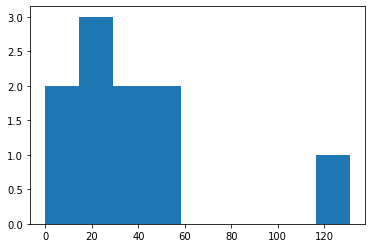

In [ ]:
objeto.graficar()#=asi

In [ ]:
import sympy 
import time
import math
import random
x=sympy.Symbol('x')
F=sympy.sympify((100-x)**2)

def func(F,x,x1):
  global i1
  i1+=1
  return F.subs(x,x1)
i1=0;n=100
a_i=0
b_i=0
delta=0.05#delta *100
Noran=random.random()#Numero generado aleatoriamente
x1=Noran
x0=x1-delta
x2=x1+delta

a=[x0,x1,x2,F.subs(x,x0),F.subs(x,x1),F.subs(x,x2),delta,a_i,b_i]
#   0  1  2      3              4             5      6     7  8
i=1;
a_=time.time()
while (i<n):
  if (a[3]>a[4]>a[5]):
      a[0]=a[1]
      a[1]=a[2]
      a[3]=a[4]
      a[4]=a[5]
      a[2]=a[1]+((2**i)*abs(a[6]))#x2=x2+2^i*delta
      a[5]=func(F,x,a[2])
#  if(a[5]<a[3]):
      a[7]=a[0]
      a[8]=a[2]
  elif (a[3]>=a[4]<=a[5]):
    a[8]=a[2]#hacemos extremo b el nuevo punto calculado
    break
  else:
    a[2]=a[1]
    a[1]=a[0]
    a[5]=a[4]
    a[4]=a[3]
    a[0]=a[1]+((2**i)*abs(a[6])*-1)#x2=x2+2^i*delta
    a[3]=func(F,x,a[0])
    a[8]=a[1]
    a[7]=a[0]
  i+=1
b_=time.time()
print('\n\nNo de evaluaciones:',i1,'Iteracion No:',i,'Tiempo:',b_-a_)
print('El valor esta entre:',a[7],'y',a[8])
print('Parametro Delta:',delta,'No aleatorio:',Noran)
#Podemos observar en el algoritmo que simpre se debe poner uno de los puntos extremos como el punto del intervalo
#ya que si el delta es grande y desde el punto x0 al punto x0+delta hay cambio de pendiente
#si usamos este x+delta como extremo, hay veces que el intervalo podría salirse debido a este cambio de pendiente
#Existe una iteracion mas   ue evaluaciones debido a que el contador inica en i para utilizarlo también en la formula para 
#calcular las x



No de evaluaciones: 11 Iteracion No: 12 Tiempo: 0.009114265441894531
El valor esta entre: 51.50083226906254 y 205.10083226906255
Parametro Delta: 0.05 No aleatorio: 0.3508322690625416


In [ ]:
#Metodo exhaustivo
import sympy 
import time
import math
x=sympy.Symbol('x')

b=6;a_1=1
L=abs(b-a_1)#90 positivo#180/1=180
F=sympy.sympify(sympy.sin(x)/(1+x**2))
def func(F,x,x1):
  global i1
  i1+=1
  return F.subs(x,x1)
#Metodo exaustivo
e=0.05;n=(2*L)/e#180/e     e=>error
i1=0#Nuemro de evaluaciones a la funcion inicia en 0
x1=a_1;dx=L/n#e/2 donde e= error
x2=x1+dx
x3=x2+dx
#usamos 3 evaluaciones antes de empezar el ciclo
a=[func(F,x,x1),func(F,x,x2),func(F,x,x3)]
i=0;a_i=time.time()
while(x3<b):
  print('Iteracion:',i,'\tEvaluacion No',i1-3,'\n','\t\t','x1=',round(x1,2),'x2=',round(x2,2),'x3=',round(x3,2))
  print('\t\t','F(x1)=',round(a[0],4),'F(x2)=',round(a[1],4),'F(x3)=',round(a[2],4))
  if (a[0]>=a[1]<a[2]):
    break
  else:
    x1,x2,x3=x2,x3,x3+dx
    a=[a[1],a[2],func(F,x,x3)]
    if(x3>b):
      break
  i+=1
b_f=time.time()
print('\n\nNo de evaluaciones:',i1-3,'Iteracion No:',i,'Tiempo de ejecucion:',b_f-a_i)
print('El valor esta entre:',x1,x3)
print('Punto medio:x*=',x2,'evaluacion en el optimo: f(x*)=',a[1])

Iteracion: 0 	Evaluacion No 0 
 		 x1= 1 x2= 1.02 x3= 1.05
		 F(x1)= 0.4207 F(x2)= 0.4168 F(x3)= 0.4126
Iteracion: 1 	Evaluacion No 1 
 		 x1= 1.02 x2= 1.05 x3= 1.07
		 F(x1)= 0.4168 F(x2)= 0.4126 F(x3)= 0.4080
Iteracion: 2 	Evaluacion No 2 
 		 x1= 1.05 x2= 1.07 x3= 1.1
		 F(x1)= 0.4126 F(x2)= 0.4080 F(x3)= 0.4033
Iteracion: 3 	Evaluacion No 3 
 		 x1= 1.07 x2= 1.1 x3= 1.12
		 F(x1)= 0.4080 F(x2)= 0.4033 F(x3)= 0.3982
Iteracion: 4 	Evaluacion No 4 
 		 x1= 1.1 x2= 1.12 x3= 1.15
		 F(x1)= 0.4033 F(x2)= 0.3982 F(x3)= 0.3930
Iteracion: 5 	Evaluacion No 5 
 		 x1= 1.12 x2= 1.15 x3= 1.17
		 F(x1)= 0.3982 F(x2)= 0.3930 F(x3)= 0.3876
Iteracion: 6 	Evaluacion No 6 
 		 x1= 1.15 x2= 1.17 x3= 1.2
		 F(x1)= 0.3930 F(x2)= 0.3876 F(x3)= 0.3820
Iteracion: 7 	Evaluacion No 7 
 		 x1= 1.17 x2= 1.2 x3= 1.22
		 F(x1)= 0.3876 F(x2)= 0.3820 F(x3)= 0.3762
Iteracion: 8 	Evaluacion No 8 
 		 x1= 1.2 x2= 1.22 x3= 1.25
		 F(x1)= 0.3820 F(x2)= 0.3762 F(x3)= 0.3703
Iteracion: 9 	Evaluacion No 9 
 		 x1= 1.22 x2

In [ ]:
# Cuando se rompe el ciclo se aumenta el contador de iteracion pero este ya no entra porque ya no se cumple la condicion
# si quitamos el contador de los ciclos cuadran
# Podemos apreciar que en la iteracion 51 dónde x1=4.27 x2=4.3 x3=4.32
# Sus evaluaciones f(x1)=-0.046 f(x2)=-0.047 f(x3)=-0.046
# la función cambia de pendiente ya que f(x1)=-0.046>f(x2)<-0.046=f(x3)
# Ya que son valores negativos, -0.046 está antes que -0.047
# por lo que el mínimo local esta entre los x [4.27,4.32]

[-0.0469951409730524, -0.0470069746921219, -0.0469865119930090]


In [ ]:
#Metodo de division por la mitad
import sympy 
import time
import math
x=sympy.Symbol('x')
F=sympy.sympify(sympy.sin(x)/(1+x**2))
i1=0
#Metodo de division por la mitad
def ev_fun(a=3,b=5,e=0.05):
  try:
    return (2*math.log(b-a)-2*math.log(e))/math.log(2)
  except:
    return None
def func(F,x,x1):
  global i1
  i1+=1
  return F.subs(x,x1)
e=0.05
a_1=-7
b=-9
L=abs(b-a_1)/4#90 positivo#180/1=180
x1=a_1+L
x2=b-L
xm=(a_1+b)/2#210/2=110
#usamos 3 evaluaciones antes de empezar el ciclo
arr=[a_1,b,x1,x2,xm,func(F,x,x1),func(F,x,x2),func(F,x,xm),L]
#     0  1  2  3  4        5            6             7    8
#print('Iteracion:',i,'\n','\t\t','x1=',round(x1,2),'x2=',round(x2,2),'x3=',round(x3,2))
#print('\t\t','F(x1)=',round(a[0],4),'F(x2)=',round(a[1],4),'F(x3)=',round(a[2],4))
x=sympy.Symbol('x')
i1=0
i=0;a_i=time.time()
while(e<arr[8]):
  print('Iteracion:',i,'Evaluacion:',i1,'\n','\t\t','x1=',round(arr[2],2),'x2=',round(arr[4],2),'x3=',round(arr[3],2))
  print('\t\t','F(x1)=',round(arr[5],4),'F(x2)=',round(arr[7],4),'F(x3)=',round(arr[6],4),'\n','\t\t Tamaño del intervalo',arr[8])
  if (arr[5]<arr[7]):#f(x1)<f(xm)
    arr[1]=arr[4]#b=xm 
    arr[4]=arr[2]#xm=x1 
    arr[7]=arr[5]
  elif (arr[6]<arr[7]):#f(x2)<f(xm)
    arr[0]=arr[4]#a=xm
    arr[4]=arr[3] #xm=x2 
    arr[7]=arr[6]
  else:
    arr[0]=arr[2]#a=x1 
    arr[1]=arr[3]#b=x2 cambia nuestra b lo que cambia x2
  arr[8]=abs(arr[1]-arr[0])#afectamos L lo q afecta x1 y x2
  arr[2]=arr[0]+(arr[8]/4)#x1=a+L/4
  arr[3]=arr[1]-(arr[8]/4)#x2=b-L/4
  arr[5]=func(F,x,arr[2])
#  if(i1==33):
#    break
  arr[6]=func(F,x,arr[3])
#  if(i1==32):
#    break
  i+=1
b_f=time.time()
n_ite=ev_fun(a=a_1,b=b,e=e)
print('\nNo de evaluaciones:',i1,'\nIteracion No:',i,'\nTiempo de ejecucion:',b_f-a_i)
print('El numero de evaluaciones debe ser mayor a ',n_ite,'\nEl valor esta entre',arr[0],arr[1])
print('Punto medio:x*=',(arr[0]+arr[1])/2,'evaluacion en el optimo: f(x*)=',func(F,x,(arr[0]+arr[1])/2))
print('Tamaño del último intervalo',arr[8],'error establecido:',e)
print('El intervalo debe ser menor al error',arr[8],'<',e)
#dado que el numero de iteraciones debe ser mayor a 32.91 se esperaria ver que debe ser 33 pero como por una iteracion
#hay 2 evaluaciones en la funcion entonces no hay numeros pares en las evaluaciones ya que aumenta de 2 en 2
#por lo q es natural ver el 34 en el numero de evaluaciones aunq se piense q deberia ser 33
#si se coloca un if en la evaluacion 33 para romper la última llamada ala funcion se aprecia q se cumple la
#desigualdad |b_n-a_n|<error (arr[1]-arr[0])<0.001, ya que la llamada a la funcion no implica el recalculo del intervalo
#pero si se pausa en la evaluacion31 ya no se cumple
#si se coloca el if despues de las 2 llamadas a las funciones para verificar con numeros pares
#para la llamada 32 la desigualdad no se cumple, hasta la 34

Iteracion: 0 Evaluacion: 0 
 		 x1= -6.5 x2= -8.0 x3= -9.5
		 F(x1)= -0.0050 F(x2)= -0.0152 F(x3)= 0.0008 
 		 Tamaño del intervalo 0.5
Iteracion: 1 Evaluacion: 2 
 		 x1= -5.75 x2= -8.0 x3= -10.25
		 F(x1)= 0.0149 F(x2)= -0.0152 F(x3)= 0.0069 
 		 Tamaño del intervalo 3.0
Iteracion: 2 Evaluacion: 4 
 		 x1= -4.62 x2= -8.0 x3= -11.38
		 F(x1)= 0.0445 F(x2)= -0.0152 F(x3)= 0.0071 
 		 Tamaño del intervalo 4.5
Iteracion: 3 Evaluacion: 6 
 		 x1= -2.94 x2= -8.0 x3= -13.06
		 F(x1)= -0.0210 F(x2)= -0.0152 F(x3)= -0.0028 
 		 Tamaño del intervalo 6.75
Iteracion: 4 Evaluacion: 8 
 		 x1= -3.78 x2= -2.94 x3= -8.84
		 F(x1)= 0.0390 F(x2)= -0.0210 F(x3)= -0.0069 
 		 Tamaño del intervalo 3.375
Iteracion: 5 Evaluacion: 10 
 		 x1= -2.52 x2= -2.94 x3= -10.11
		 F(x1)= -0.0799 F(x2)= -0.0210 F(x3)= 0.0061 
 		 Tamaño del intervalo 5.0625
Iteracion: 6 Evaluacion: 12 
 		 x1= -3.57 x2= -2.52 x3= -3.15
		 F(x1)= 0.0302 F(x2)= -0.0799 F(x3)= 0.0006 
 		 Tamaño del intervalo 0.84375
Iteracion: 7 Evalua

#Para el Método de Sección Aurea
$$ \phi\approx1.618033\\ (\tau)^N=(\phi-1)^N\\
(\tau)^N|b-a|=|b_n-a_n|<\epsilon\\
\epsilon>(\tau)^N|b-a|\\
\epsilon^2>(\tau)^{2N}(b-a)^2\\
\frac{\epsilon^2}{(b-a)^2}>(\tau)^{2N}\\
log\left(\frac{\epsilon^2}{(b-a)^2}\right)>log((\tau)^{2N})\\
log\left(\epsilon^2\right)-log\left((b-a)^2\right)>log((\tau)^{2N})\\
log(\epsilon)-log(b-a)>N*log(\tau)$$
Resolvemos para N
$$
N< \frac {log(\epsilon)-log(b-a)}{log(\tau)} 
$$
Dnde N es el No de evaluaciones que es igual al No de iteraciones

#Para el método de división por la mitad
$$ 
\left(\frac{1}{2}\right)^{\frac{n}{2}}|b-a|=|b_n-a_n|<\epsilon\\
\left(\frac{1}{2^n}\right)^{\frac{1}{2}}|b-a|<\epsilon\\
\frac{1}{2^n}(b-a)^2<\epsilon^2\\
\frac{(b-a)^2}{\epsilon^2}<2^n\\
log\left(\frac{(b-a)^2}{\epsilon^2}\right)<log(2^n)\\
log(b-a)-log(\epsilon)<n*log(2)\\
\frac{2*log(b-a)-2*log(\epsilon)}{log(2)}<n$$
Dónde n es el No de evaluaciones y n/2 el No de iteraciones

In [ ]:
#Metodo de la seccion dorada "aurea"
import sympy 
import math
import time
x=sympy.Symbol('x')
F=sympy.sympify(sympy.sin(x)/(1+x**2))
#Metodo de la seccion dorada "aurea"
phi= ( 1 + math.sqrt(5) ) / 2
phi
def ev(a,b,E,phi):
  return ((math.log(E)-math.log(b-a)))/math.log(phi-1)
def func(F,x,x1):
  global i1
  i1+=1
  return F.subs(x,x1)
a=3;b=5
E=0.5
L=b-a#90
T=(-1+math.sqrt(5))/2#razon aurea
x1=b-T*L
x2=a+T*L
ar=[a,b,x1,x2,F.subs(x,x1),F.subs(x,x2),L]
#   0 1 2  3       4          5         6
i1=0;i=0;
a_in=time.time()
while (ar[6]>E):
  print('Iteracion:',i,'Evaluacion',i1,'\n','\t\t','x1=',round(ar[2],2),'x2=',round(ar[3],2))
  print('\t\t','F(x1)=',round(ar[4],4),'F(x2)=',round(ar[5],4),'\n','\t\t Tamaño del intervalo',ar[6])
  if (ar[4]<ar[5]):#f(x1)<f(x2)
    ar[1]=ar[3]#b=x2
    ar[3]=ar[2]#x2=x1
    ar[5]=ar[4]#f(x2)=f(x1)
    ar[6]=ar[1]-ar[0]#L=b-a
#    if(ar[6]<E):
#      break
    ar[2]=ar[1]-T*ar[6]#x1=b-T*L
    ar[4]=func(F,x,ar[2])
  else:
    ar[0]=ar[2]#a=x1
    ar[2]=ar[3]#x1=x2
    ar[4]=ar[5]#f(x1)=f(x2)
    ar[6]=ar[1]-ar[0]#L=b-a
#    if(ar[6]<E):
#      break
    ar[3]=ar[0]+T*ar[6]#x2=a+T*L
    ar[5]=func(F,x,ar[3])
  i+=1
b_fi=time.time()

print('\nNo de evaluaciones:',i1,'\nIteracion No:',i,'\nTiempo de ejecucion:',b_fi-a_in)
print('El numero de evaluaciones debe ser menor a ',ev(a,b,E,phi),'≈',math.ceil(ev(a,b,E,phi)),'\nEl valor esta entre',ar[0],ar[1])
print('Punto medio:x*=',(ar[0]+ar[1])/2,'evaluacion en el optimo: f(x*)=',func(F,x,(ar[0]+ar[1])/2))
print('Tamaño del último intervalo',ar[6],'error establecido:',E)
print('El intervalo debe ser menor al error',ar[6],'<',E)
#Al calcular el numero de iteraciones nos damos cuenta q estan acotadas por cierto numero
#al resolver la desigualdad, el numero calculado suele tener decimales y
#el numero de iteracione que es igual al de evaluaciones, se muestra
#algunas veces en el numero entero siguiente a la cota calculada
#esto se debe a que se calcula el intervalo, luego se suma 1 al
#numero de iteraciones y despues se comparar nuevamente 
#la condicion del while, es por esto q aparece un valor por encima
#por eso se decidio redondear la cota hacia arriba, sin embargo
#si usamos un if justo depues de calcular el intervalo if(ar[6]<E):
#que compara el intervalo con el error y rompe el ciclo, ya no se 
#presenta esta violacion de la cota exacta

Iteracion: 0 Evaluacion 0 
 		 x1= 3.76 x2= 4.24
		 F(x1)= -0.0384 F(x2)= -0.0469 
 		 Tamaño del intervalo 2
Iteracion: 1 Evaluacion 1 
 		 x1= 4.24 x2= 4.53
		 F(x1)= -0.0469 F(x2)= -0.0457 
 		 Tamaño del intervalo 1.2360679774997898
Iteracion: 2 Evaluacion 2 
 		 x1= 4.06 x2= 4.24
		 F(x1)= -0.0454 F(x2)= -0.0469 
 		 Tamaño del intervalo 0.7639320225002102

No de evaluaciones: 3 
Iteracion No: 3 
Tiempo de ejecucion: 0.020751953125
El numero de evaluaciones debe ser menor a  2.880840180825113 ≈ 3 
El valor esta entre 4.055728090000841 4.52786404500042
Punto medio:x*= 4.291796067500631 evaluacion en el optimo: f(x*)= -0.0470066880979515
Tamaño del último intervalo 0.4721359549995796 error establecido: 0.5
El intervalo debe ser menor al error 0.4721359549995796 < 0.5


In [ ]:
T1=59.807496070861816
T2=0.002138853073120117
T3=0.0016798973083496094
#EL primer algoritmo nos sirve para saber lo lento q puede
#volverse atacar con fuerza bruta los minimos de la funcion
#sin embargo en los metodos siguientes nos damos cuenta que el
#algoritmo de proporcion aurea converge en un tiempo mucho mas rapido
#y esto es debido a que en cada iteracion solo necesita la llamada
#a la funcion 1 vez, mientras que en el algoritmo de punto medio
#llama a la funcion 2 veces en 1 iteracion

In [ ]:
a1=[[3,5],[3.5,5.5],[4,6],[-8,-6],[-8.5,-6.5],[-7,-9],[-2,0],[-1.5,0.5],[-1.3,0.7],[1,6]]

In [ ]:
a1=[[3,5],[3.5,5.5],[4,6],[-8,-6],[-8.5,-6.5],[-7,-9],[-2,0],[-1.5,0.5],[-1.3,0.7],[1,6]]
for i in range(len(a1)):
  for j in range(len(a1[i])):
    print(a1[i][j])
  print(a1[i])

3
5
[3, 5]
3.5
5.5
[3.5, 5.5]
4
6
[4, 6]
-8
-6
[-8, -6]
-8.5
-6.5
[-8.5, -6.5]
-7
-9
[-7, -9]
-2
0
[-2, 0]
-1.5
0.5
[-1.5, 0.5]
-1.3
0.7
[-1.3, 0.7]
1
6
[1, 6]
